## Активность сайта Хартия97

Анализ активности сайта http://chacter97.org. Изучается динамика публикаций и комментариев пользователей с 25 сентября 2007 по 31 декабря 2016 гг.

*Просьба подсказать, как правильно вывести данные в график matplotlib (с сортировкой по годам по возрастанию).

In [15]:
# Загружаем необходимые для работы модули:
import csv
import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Загружаем файл с данными, преобразуем его в словарь и смотрим объем данных:
with open("data/charter97.csv") as csv_file:
    data = [datum for datum in csv.DictReader(csv_file)]
len(data)

228575

In [10]:
# В файле 228 575 строчек. Каждая строчка - это статья на Хартии.
# Смотрим, какие данные находятся в отдельной строчке:
data[0]

{'comments': '2116',
 'date': '2012-03-17',
 'link': 'http://charter97.org/ru/news/2012/3/17/49399/',
 'title': 'Владислава Ковалева расстреляли'}

### Структура данных

Для отдельной записи указаны:

- Название статьи
- Дата публикации
- Количество комментариев
- Гиперссылка

Простейшая аналитическая операция, которую можно сделать - это посмотреть динамику статей и комментариев во времени. Для этого нужно узнать, сколько статей и комментариев публикуется в год:

In [6]:
# Делаем две выборки: одну для статей, вторую для комментариев:
articles = defaultdict(int)
comments = defaultdict(int)

for datum in data:
    date_string = datum["date"]
    d = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    year = d.strftime("%Y")
    articles[year] += 1
    comments[year] += int(datum["comments"])

In [8]:
# Распечатываем обе выборки и смотрим, что получилось:
articles

defaultdict(int,
            {'2007': 2479,
             '2008': 10113,
             '2009': 10686,
             '2010': 9310,
             '2011': 10519,
             '2012': 15916,
             '2013': 18318,
             '2014': 49698,
             '2015': 51242,
             '2016': 50294})

In [85]:
comments

defaultdict(int,
            {'2007': 10845,
             '2008': 84198,
             '2009': 144082,
             '2010': 187705,
             '2011': 488683,
             '2012': 552026,
             '2013': 630968,
             '2014': 678360,
             '2015': 414918,
             '2016': 466314})

### Предварительные выводы

1. Пик публикаций на Хартии приходится на 2015 год - 51 242 материала. Это в среднем около 140 материалов в день.
2. Это почти в 3 раза больше материалов, чем было опубликовано в 2013 году. Очень внушительный рост за 2 года.
3. Пик комментариев пользователей пришелся на 2014 год - 678 360. С тех по комментариям Хартия откатилась на уровень 2010 года.

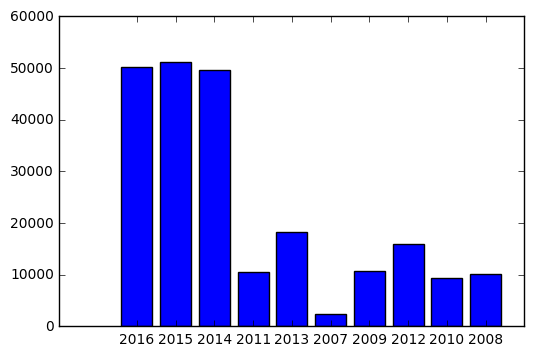

In [19]:
# Строим график для статей, чтобы было нагляднее
# Тут сюрприз с сортировкой данных. Пока не решил как это побороть

plt.bar(range(len(articles)), articles.values(), align='center')
plt.xticks(range(len(articles)), articles.keys())

plt.show()

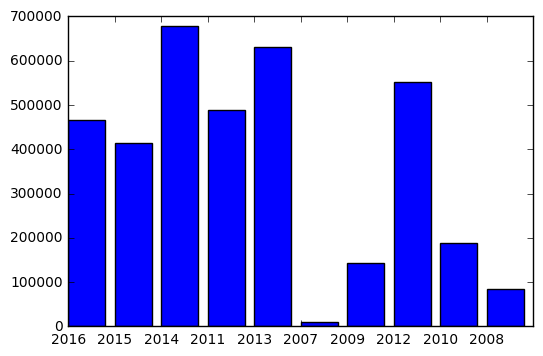

In [20]:
plt.bar(range(len(comments)), comments.values())
plt.xticks(range(len(comments)), comments.keys())

plt.show()